In [22]:
import numpy as np

In [23]:
from src.utils.data_loader import *

X_train, X_test, y_train, y_test = load_data()

X_train.min()

np.float32(-0.100000024)

In [24]:
from src.layers.Conv2D import Conv2D

i = X_train[0]
img = np.expand_dims(i, axis=0)
img.shape

(1, 1, 32, 32)

In [25]:
layer = Conv2D(1, 6, 5)
out = layer.forward(img)
out.shape

(1, 6, 28, 28)

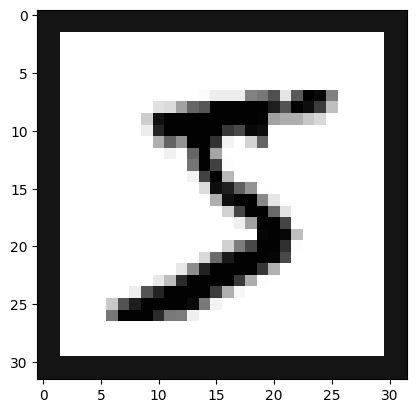

In [26]:
import matplotlib.pyplot as plt
plt.imshow(i[0], cmap='gray')

In [27]:
import matplotlib.pyplot as plt

a = out[0]
a.shape

(6, 28, 28)

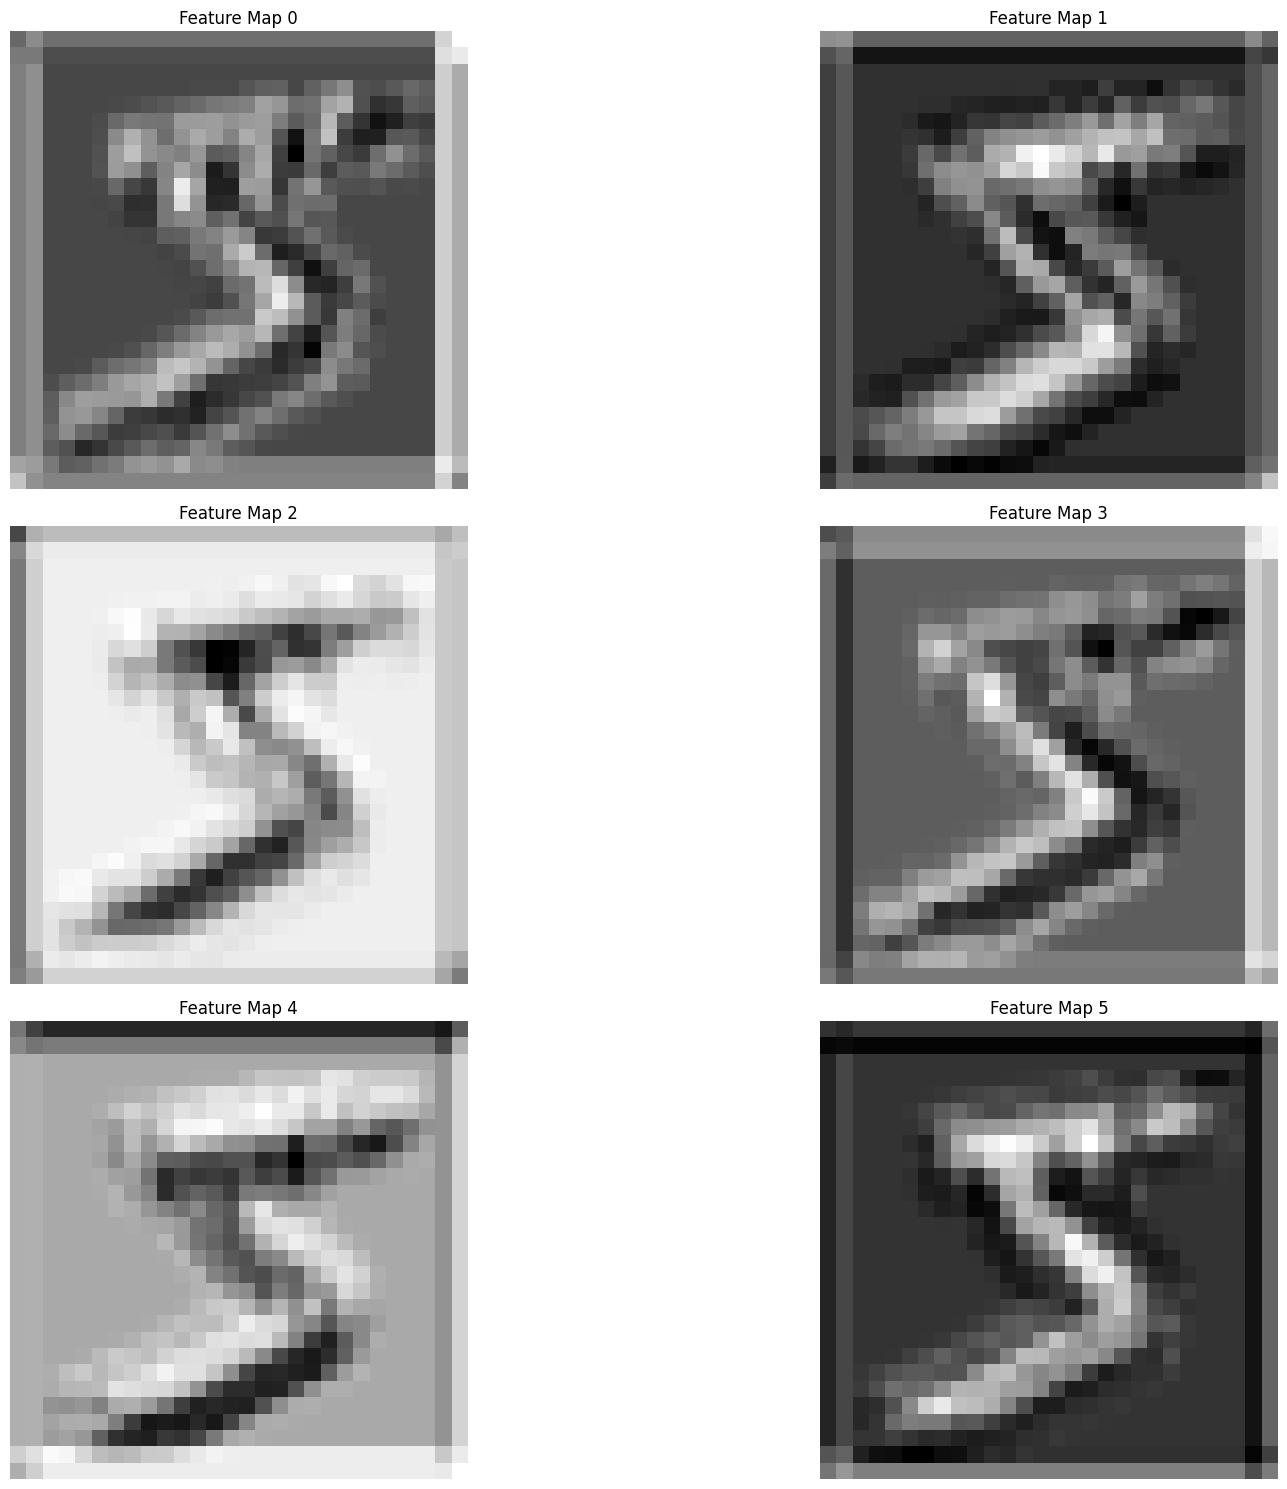

In [28]:
fig, axes = plt.subplots(3,2, figsize = (20,15))

for i, ax in enumerate(axes.flat):
    ax.imshow(a[i], cmap ='gray')
    ax.set_title(f"Feature Map {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [29]:
out.min(), out.max()
out.shape

(1, 6, 28, 28)

In [30]:
from src.layers.SubSamplingLayer import SubSample
pool = SubSample(6, 2)
k = pool.forward(out)
k.shape

(1, 6, 14, 14)

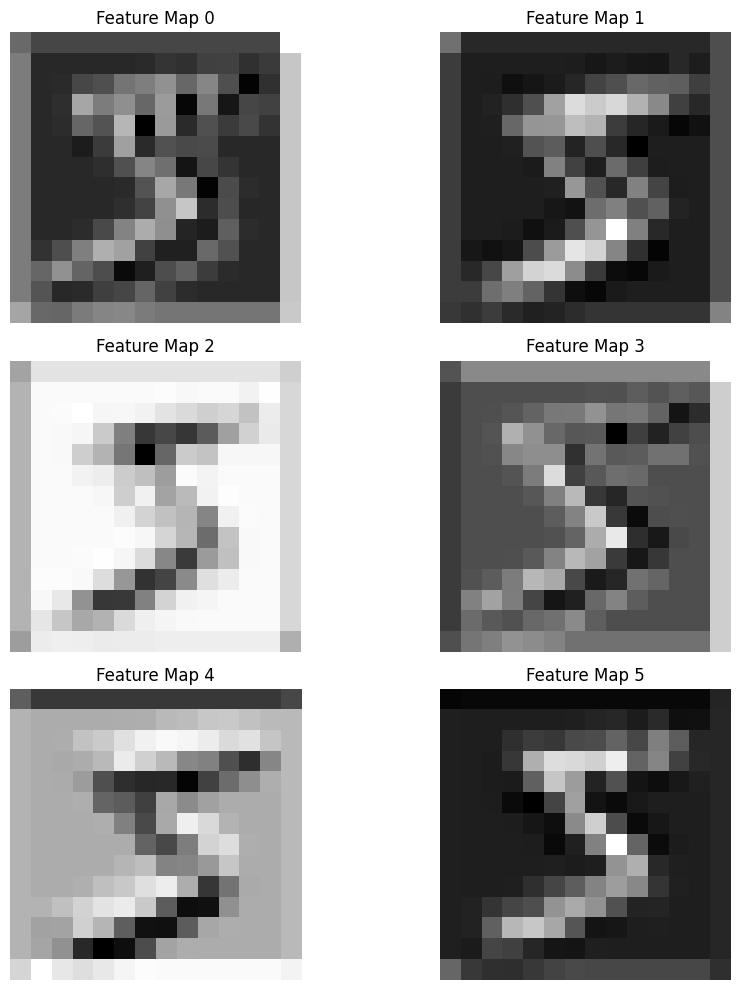

In [31]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3,2, figsize = (10,10))
m = k[0]
for i, ax in enumerate(axes.flat):
    ax.imshow(m[i], cmap='gray')
    ax.set_title(f"Feature Map {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [32]:
connection_table = [
            [0, 1, 2],        # map 0
            [1, 2, 3],        # map 1
            [2, 3, 4],        # map 2
            [3, 4, 5],        # map 3
            [0, 4, 5],        # map 4
            [1, 2, 5],        # map 5
            [0, 1, 3, 4],     # map 6
            [1, 2, 4, 5],     # map 7
            [0, 1, 2, 5],     # map 8
            [0, 2, 3, 5],     # map 9
            [1, 3, 4, 5],     # map 10
            [0, 1, 4, 5],     # map 11
            [0, 1, 2, 3],     # map 12
            [0, 1, 2, 3, 4],  # map 13
            [1, 2, 3, 4, 5],  # map 14
            [0, 1, 2, 3, 4, 5]  # map 15
        ]

In [33]:
C3 = Conv2D(6, 16, 5, connection_table=connection_table)
C3_out = C3.forward(k)
C3_out.shape

(1, 16, 10, 10)

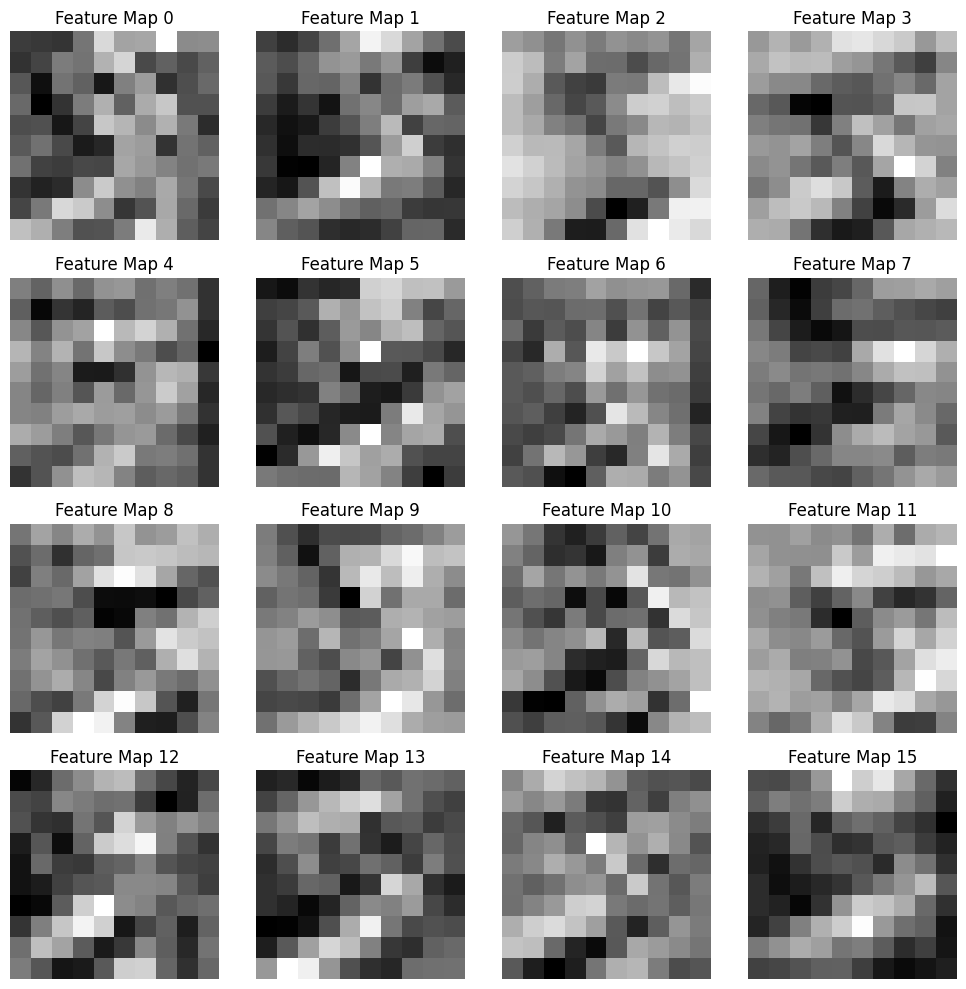

In [34]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4,4, figsize = (10,10))
s = C3_out[0]
for i, ax in enumerate(axes.flat):
    ax.imshow(s[i], cmap ='gray')
    ax.set_title(f"Feature Map {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [48]:
S4 = SubSample(16, 2)
S4_out = S4.forward(C3_out)
S4_out[0][0]

array([[-0.52193838, -0.42895193, -0.22557316, -0.32734473, -0.40562089],
       [-0.53580978, -0.43965967, -0.41997965, -0.33697417, -0.46140687],
       [-0.45472909, -0.54396044, -0.33254934, -0.36542001, -0.44589081],
       [-0.50657367, -0.47912027, -0.33275004, -0.3330839 , -0.41943889],
       [-0.34641172, -0.30860613, -0.43193005, -0.28898872, -0.47320625]])

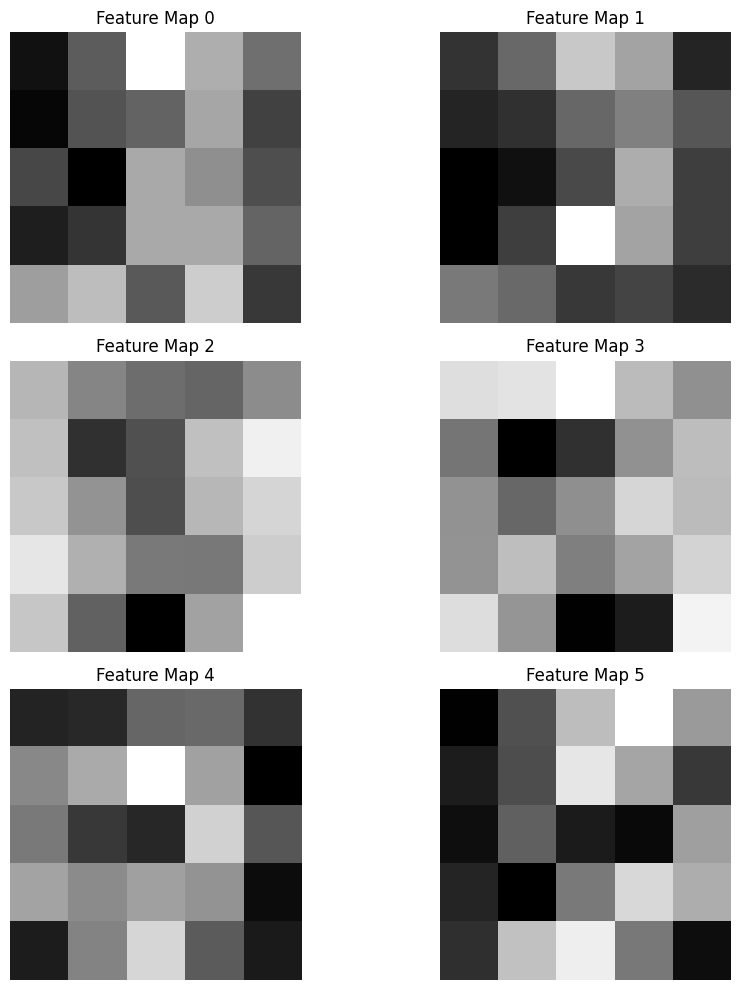

In [36]:
fig, axes = plt.subplots(3, 2, figsize = (10, 10))
m = S4_out[0]
for i, ax in enumerate(axes.flat):
    ax.imshow(m[i], cmap='gray')
    ax.set_title(f"Feature Map {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [42]:
C5 = Conv2D(16, 120, 5)
C5_out = C5.forward(S4_out)
l = C5_out[0][0:10][0]
l

array([[0.05375195]])

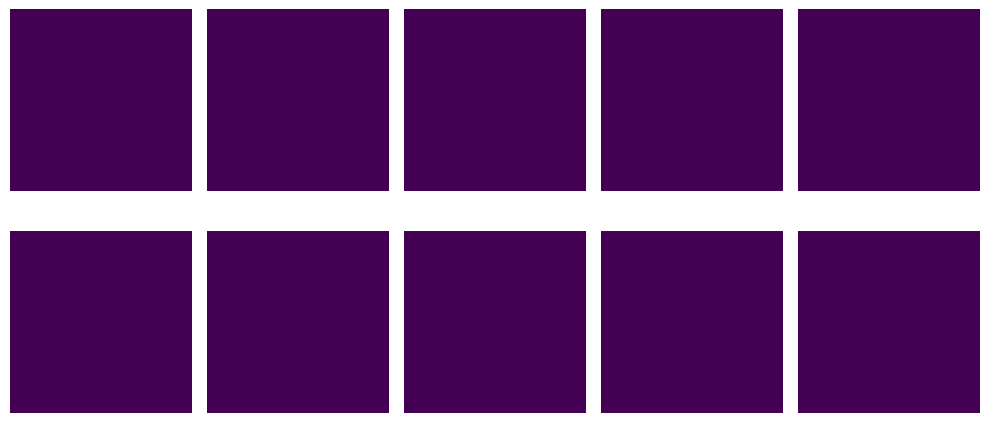

In [ ]:
fig, axes = plt.subplots(2,5,figsize = (10,5))

for i, ax in enumerate(axes.flat):
    ax.imshow(l[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

In [39]:
from src.layers.Flatten import Flatten

F = Flatten()
F_1 = F.forward(C5_out)
F_1.shape

(1, 120)

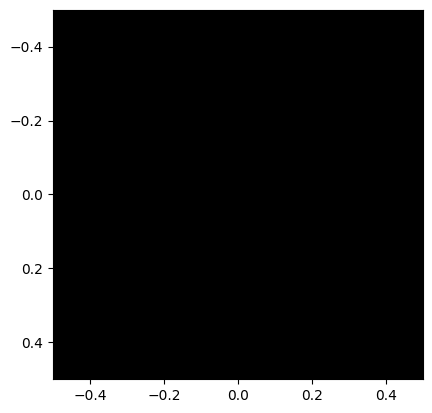

In [ ]:
plt.imshow(np.array([[-0.52193838, -0.42895193, -0.22557316, -0.32734473, -0.40562089],
       [-0.53580978, -0.43965967, -0.41997965, -0.33697417, -0.46140687],
       [-0.45472909, -0.54396044, -0.33254934, -0.36542001, -0.44589081],
       [-0.50657367, -0.47912027, -0.33275004, -0.3330839 , -0.41943889],
       [-0.34641172, -0.30860613, -0.43193005, -0.28898872, -0.47320625]]), cmap='gray')